## Hull-White Model: Interest Rate Evolution and Distribution Analysis

This notebook demonstrates how to implement and visualize the Hull-White Model using the finmc library, specifically leveraging the class finmc.models.hullwhite.HullWhiteMC. The Hull-White model is widely used in quantitative finance to model the evolution of interest rates. It accounts for mean reversion and volatility, making it a flexible tool for pricing bonds, options, and other interest rate derivatives.



## What This Notebook Covers

Create dataset for this model. See [Hull-Whote Model Documentation](https://finlib.github.io/finmc/models/hullwhite/) for explanation of model parameters. We will first create a dataset with a zero rate curve that is flat at 5%.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import joypy
from finmc.models.hullwhite import HullWhiteMC
from finmc.plots.asset import plot_asset

### 1. Dataset Creation
We begin by constructing a dataset for the Hull-White model with a flat yield curve (constant rate across maturities).
The yield curve is then modified to a non-flat term structure, showcasing how rates evolve differently based on varying maturities.

In [2]:
# Step 1: Define the dataset
dataset = {
    "MC": {"PATHS": 10000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}


### 2. Model Simulation and Visualization
The notebook simulates the evolution of short rates using the Hull-White model across multiple paths over time.
Two key plots are generated to visualize the rate evolution:
Short Rate Progression (Flat Yield Curve):
The initial evolution of short rates under a flat yield curve is plotted.
Short Rate Progression (Non-Flat Yield Curve):
After introducing a non-flat term structure (where rates decrease with longer maturities), the short rate progression is re-plotted to observe the effect of this term structure.

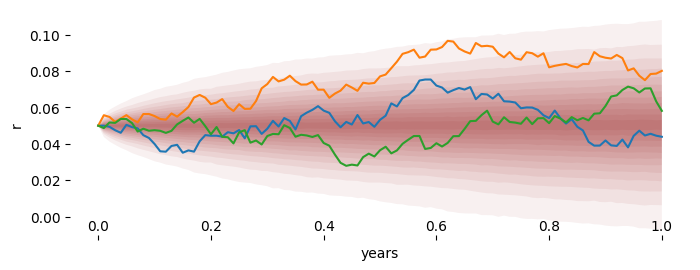

In [3]:
# Step 2: Initialize and plot the Hull-White model (Flat Yield Curve)
model = HullWhiteMC(dataset)
plot_asset(model, "r")  # Plot initial short rate progression (flat yield curve)

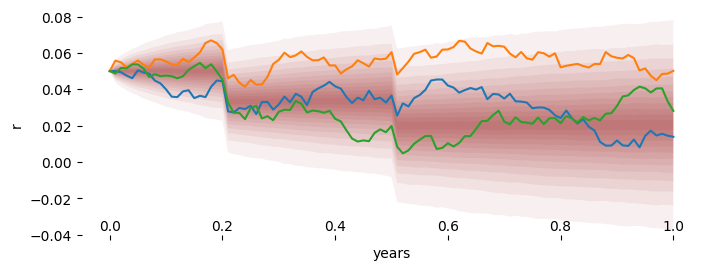

In [4]:
# Step 3: Modify the yield curve to non-flat and re-plot
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.04], [1.0, 0.03]]),
)
plot_asset(model, "r")  # Plot after modifying the yield curve (non-flat)

### 3. Joy Plot of Rate Distributions
In addition to the individual path evolution, the notebook generates a joy plot that visualizes the distribution of short rates at different time steps.
This distribution-based visualization highlights how the uncertainty in interest rates grows over time.

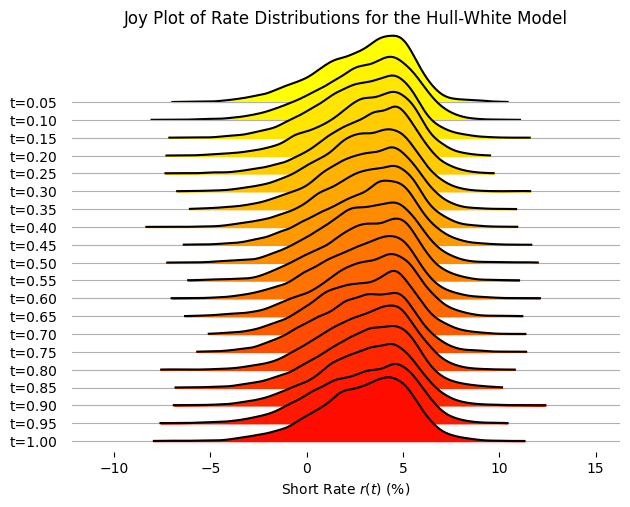

In [5]:

# Step 4: Generate spot rates and sample paths for joy plot
num_paths = 10000
times = np.linspace(0.05, 1.0, 20)  # Time steps
model.reset()

# Collect spot rates for all paths at different time steps
all_spots = []
for t in times:
    model.advance(t)
    spot_rates = model.get_value("r") * 100  # Convert to percentages
    all_spots.append(spot_rates)

# Convert collected data into a 2D NumPy array
all_spots = np.array(all_spots).T  # Shape: (num_paths, num_time_steps)
all_spots = all_spots.flatten()  # Flatten the sampled data into a 1D array

# Create a DataFrame for joypy
samples_df = pd.DataFrame({"values": all_spots})
samples_df["time"] = [f"t={t:4.2f}" for t in times for _ in range(num_paths)]

# Step 5: Create the Joy Plot
fig, axes = joypy.joyplot(
    samples_df,
    by="time",
    column="values",
    colormap=cm.autumn_r,
    kind="kde",
    range_style="own",
    grid="y",
    tails=1e-2,
)

plt.xlabel("Short Rate $r(t)$ (%)")
plt.ylabel("Time Steps $t$")
plt.title("Joy Plot of Rate Distributions for the Hull-White Model")
plt.show()
